<a href="https://colab.research.google.com/github/khaeraniazi/khaerani/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project 
Nama : 

*   Viny Gilang Ramadhan
*   Khaerani Nur Azizah

*   Chintya N Mandalahi
*   Yogi P Herfen

##### Final project kali ini menggunakan dataset Feedback karyawan Telkomsel terkait IT pada tahun 2022. Project kali ini akan membuat sistem pengklasifikasian sentiment positif, negatif, dan atau netral terhadap feedback yang telah diberikan. nantinya hasil model kali ini dapat digunakan untuk memprediksi sentiment pada feedback yang baru.

Penjelasan Dataset : 
1. Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT? --> ini adalah column feedback yang diisi user.
2. Hastag1 --> Keyword Feedback
3. Hastag2 --> Detail Feedback
4. Sentiment --> Sentiment berupa positif, negativ, atau netral terhadap feedback yang diberikan oleh user.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
import os
# ganti alamat penyimpanan file pada drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/Training/Final Project") #viny drive

fileNames = os.listdir()
print(fileNames)
print("Done load list")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Final_Project.ipynb', 'feedback 2022 (1).xlsx', '~$feedback 2022 (1).xlsx', '~$FeedbackIT.xlsx', 'FeedbackIT.xlsx', 'Salinan Final Project.ipynb', 'Final_Project_finalisasi.ipynb']
Done load list


In [ ]:
df = pd.read_excel("FeedbackIT.xlsx")
df.head()

,No,Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT?,Hastag1,Hastag2,sentiment decode
0,1,sudah bagus fast response,NaN,NaN,Neutral
1,2,"Menurut saya, IT sudang sangat baik dalam memb...",IT,IT sudah baik,Positif
2,3,Sudah sangat baik,Baik,Servce IT sudah baik,Positif
3,4,NaN,NaN,NaN,NaN
4,5,Kemudahan akses masuk k wifi kantor,WIFI,akses tidak mudah,Positif


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 5 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   No                                                                                    983 non-null    int64 
 1   Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT?  896 non-null    object
 2   Hastag1                                                                               612 non-null    object
 3   Hastag2                                                                               424 non-null    object
 4   sentiment decode                                                                      896 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.5+ KB


In [ ]:
df.describe()

,No
count,983.000000
mean,495.436419
std,286.884699
min,1.000000
25%,247.500000
50%,493.000000
75%,745.500000
max,991.000000


In [ ]:
df.shape

(983, 5)

In [ ]:
df.isnull().sum()

No                                                                                        0
Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT?     87
Hastag1                                                                                 371
Hastag2                                                                                 559
sentiment decode                                                                         87
dtype: int64

In [ ]:
df.set_axis(['No', 'Feedback', 'Hastag1', 'Hastag2', 'Sentiment'], axis='columns', inplace= True)
df

<ipython-input-9-8a63f87a3d26>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['No', 'Feedback', 'Hastag1', 'Hastag2', 'Sentiment'], axis='columns', inplace= True)


,No,Feedback,Hastag1,Hastag2,Sentiment
0,1,sudah bagus fast response,NaN,NaN,Neutral
1,2,"Menurut saya, IT sudang sangat baik dalam memb...",IT,IT sudah baik,Positif
2,3,Sudah sangat baik,Baik,Servce IT sudah baik,Positif
3,4,NaN,NaN,NaN,NaN
4,5,Kemudahan akses masuk k wifi kantor,WIFI,akses tidak mudah,Positif
...,...,...,...,...,...
978,987,Keren sejauh ini selalu fast respon dan member...,NaN,NaN,Positif
979,988,nihil,NaN,NaN,Neutral
980,989,share informasi terkait perkembangan tenologi ...,IT,Sosialisasi teknologi IT,Positif
981,990,SLA terkait dengan service dan data processing...,IT,Data quality,Positif


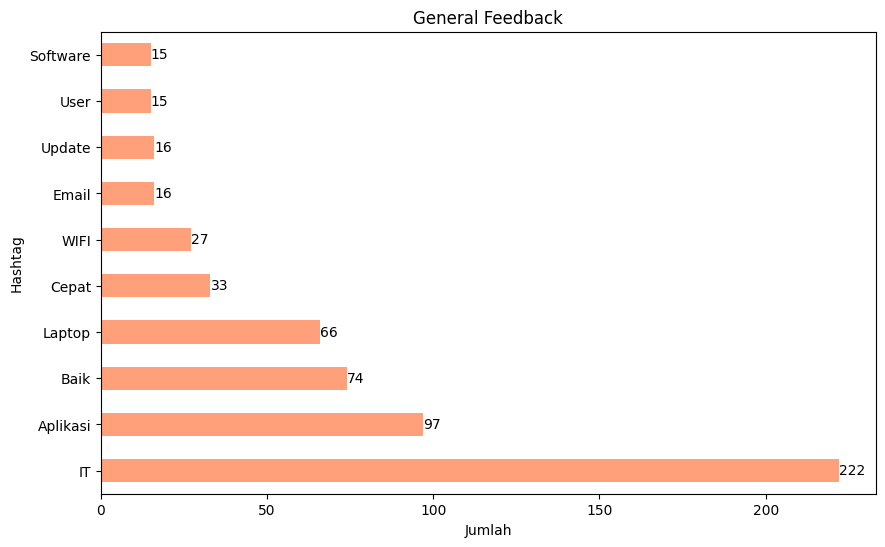

In [ ]:
hashtag_counts = df['Hastag1'].value_counts().head(10)

# Membuat plot barh
fig, ax = plt.subplots(figsize=(10,6))
hashtag_counts.plot(kind='barh', color='#FFA07A', ax=ax)

# Mengatur label dan judul
ax.set_xlabel('Jumlah')
ax.set_ylabel('Hashtag')
ax.set_title('General Feedback')

# Menambahkan label pada data
for i in range(len(hashtag_counts)):
    ax.text(hashtag_counts.iloc[i], i, str(hashtag_counts.iloc[i]), ha='left', va='center')

# Menampilkan plot
plt.show()

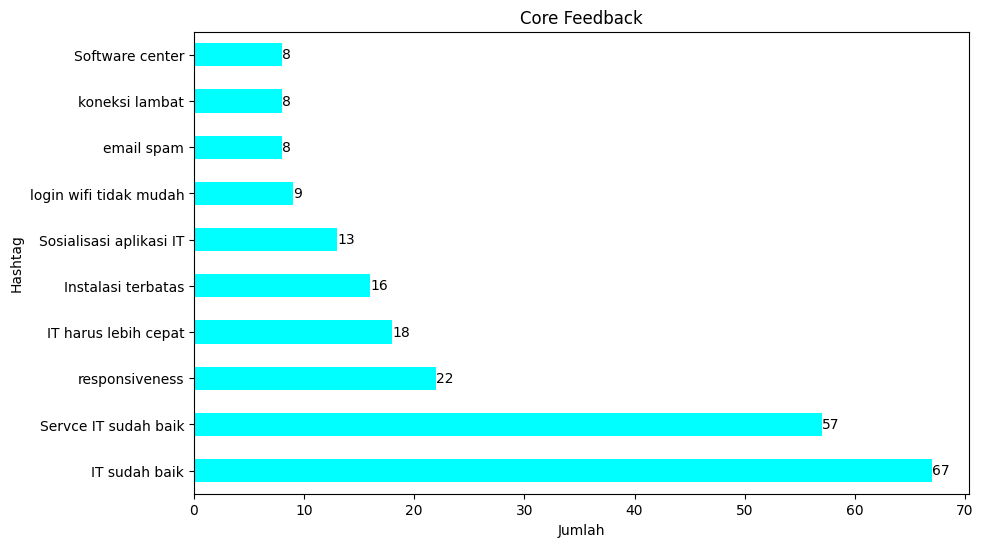

In [ ]:
hashtag_counts = df['Hastag2'].value_counts().head(10)

# Membuat plot barh
fig, ax = plt.subplots(figsize=(10,6))
hashtag_counts.plot(kind='barh', color='#00FFFF', ax=ax)

# Mengatur label dan judul
ax.set_xlabel('Jumlah')
ax.set_ylabel('Hashtag')
ax.set_title('Core Feedback')

# Menambahkan label pada data
for i in range(len(hashtag_counts)):
    ax.text(hashtag_counts.iloc[i], i, str(hashtag_counts.iloc[i]), ha='left', va='center')

# Menampilkan plot
plt.show()

In [ ]:
df['Sentiment'].value_counts()

Positif    513
Neutral    272
Negatif    111
Name: Sentiment, dtype: int64

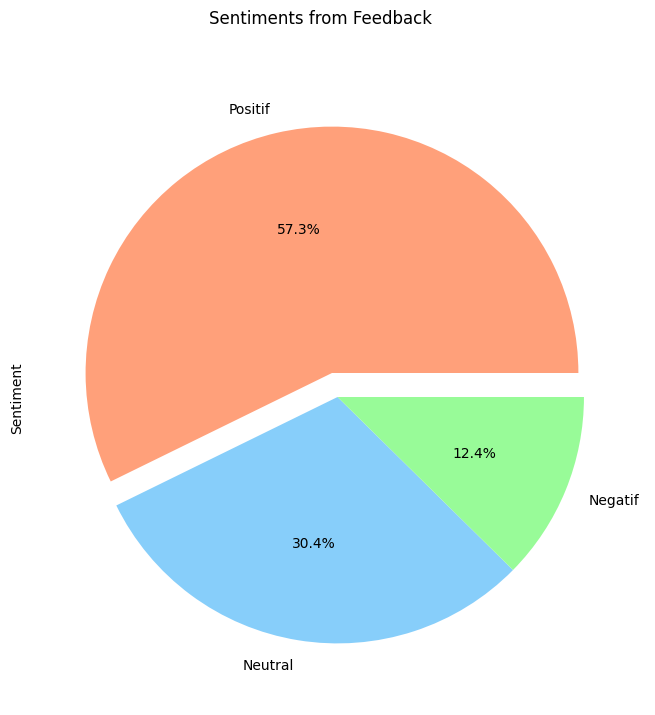

In [ ]:
# df['Sentiment'].value_counts().plot(kind='pie',subplots=True, figsize=(10,6), autopct='%1.1f%%')

colors = ['#FFA07A', '#87CEFA', '#98FB98']  # Contoh palet warna

# Membuat plot pie
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie', subplots=True, figsize=(14,8), autopct='%1.1f%%', colors=colors,title='Sentiments from Feedback', labels=sentiment_counts.index,explode = (0.1, 0, 0))

# Menampilkan plot
plt.show()

### Preprocessing

In [ ]:
df.dropna(subset = ['Feedback', 'Sentiment'], inplace=True)

In [ ]:
df.isnull().sum()

No             0
Feedback       0
Hastag1      284
Hastag2      472
Sentiment      0
dtype: int64

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['Feedback'] = df['Feedback'].str.lower()


print('Case Folding Result : \n')
print(df['Feedback'].head(5))

Case Folding Result : 

0                            sudah bagus fast response
1    menurut saya, it sudang sangat baik dalam memb...
2                                    sudah sangat baik
4                  kemudahan akses masuk k wifi kantor
5                                                    -
Name: Feedback, dtype: object


In [ ]:
def remove_feedback_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Feedback'] = df['Feedback'].apply(remove_feedback_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Feedback'] = df['Feedback'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Feedback'] = df['Feedback'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Feedback'] = df['Feedback'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Feedback'] = df['Feedback'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Feedback'] = df['Feedback'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Feedback_cleansing'] = df['Feedback'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['Feedback_cleansing'].head())
print('\n\n\n')

Tokenizing Result : 

0                       [sudah, bagus, fast, response]
1    [menurut, saya, it, sudang, sangat, baik, dala...
2                                [sudah, sangat, baik]
4              [kemudahan, akses, masuk, wifi, kantor]
5                                                   []
Name: Feedback_cleansing, dtype: object






In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')
list_stopwords.remove('baik')
# sw_list = {"baik"}
# list_stopwords = list_stopwords.difference(sw_list)

# all_stopwords_gensim = STOPWORDS
# sw_list = {"not"}
# all_stopwords_gensim = STOPWORDS.difference(sw_list)


# ---------------------------- MANUALY ADD STOPWORD  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','terkait', 'mohon','terkadang','sata'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
# txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
# list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Feedback_stopwordrem'] = df['Feedback_cleansing'].apply(stopwords_removal) 


print(df['Feedback_stopwordrem'].head())

0                      [bagus, fast, response]
1    [it, sudang, baik, kontribusi, bidangnya]
2                                       [baik]
4      [kemudahan, akses, masuk, wifi, kantor]
5                                           []
Name: Feedback_stopwordrem, dtype: object


In [ ]:
df.head()

,No,Feedback,Hastag1,Hastag2,Sentiment,Feedback_cleansing,Feedback_stopwordrem
0,1,sudah bagus fast response,NaN,NaN,Neutral,"[sudah, bagus, fast, response]","[bagus, fast, response]"
1,2,menurut saya it sudang sangat baik dalam membe...,IT,IT sudah baik,Positif,"[menurut, saya, it, sudang, sangat, baik, dala...","[it, sudang, baik, kontribusi, bidangnya]"
2,3,sudah sangat baik,Baik,Servce IT sudah baik,Positif,"[sudah, sangat, baik]",[baik]
4,5,kemudahan akses masuk wifi kantor,WIFI,akses tidak mudah,Positif,"[kemudahan, akses, masuk, wifi, kantor]","[kemudahan, akses, masuk, wifi, kantor]"
5,6,,NaN,NaN,Neutral,[],[]


In [ ]:
# back to 1 dimention
def joinStem(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text

df['Feedback2'] = df['Feedback_stopwordrem'].apply(lambda x: joinStem(x))

In [ ]:
df

,No,Feedback,Hastag1,Hastag2,Sentiment,Feedback_cleansing,Feedback_stopwordrem,Feedback2
0,1,sudah bagus fast response,NaN,NaN,Neutral,"[sudah, bagus, fast, response]","[bagus, fast, response]",bagus fast response
1,2,menurut saya it sudang sangat baik dalam membe...,IT,IT sudah baik,Positif,"[menurut, saya, it, sudang, sangat, baik, dala...","[it, sudang, baik, kontribusi, bidangnya]",it sudang baik kontribusi bidangnya
2,3,sudah sangat baik,Baik,Servce IT sudah baik,Positif,"[sudah, sangat, baik]",[baik],baik
4,5,kemudahan akses masuk wifi kantor,WIFI,akses tidak mudah,Positif,"[kemudahan, akses, masuk, wifi, kantor]","[kemudahan, akses, masuk, wifi, kantor]",kemudahan akses masuk wifi kantor
5,6,,NaN,NaN,Neutral,[],[],
...,...,...,...,...,...,...,...,...
978,987,keren sejauh ini selalu fast respon dan member...,NaN,NaN,Positif,"[keren, sejauh, ini, selalu, fast, respon, dan...","[keren, fast, respon, solusi, yng]",keren fast respon solusi yng
979,988,nihil,NaN,NaN,Neutral,[nihil],[nihil],nihil
980,989,share informasi terkait perkembangan tenologi ...,IT,Sosialisasi teknologi IT,Positif,"[share, informasi, terkait, perkembangan, teno...","[share, informasi, perkembangan, tenologi, dun...",share informasi perkembangan tenologi dunia it...
981,990,sla terkait dengan service dan data processing...,IT,Data quality,Positif,"[sla, terkait, dengan, service, dan, data, pro...","[sla, service, data, processing, guarantee, se...",sla service data processing guarantee service ...


In [ ]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) # Mengganti nilai kosong dengan NaN
# df.dropna(inplace=True) # Menghapus baris yang mengandung NaN
# df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Menghapus spasi di setiap elemen


In [ ]:
df.isna().sum()

No                        0
Feedback                 23
Hastag1                 284
Hastag2                 472
Sentiment                 0
Feedback_cleansing        0
Feedback_stopwordrem      0
Feedback2                41
dtype: int64

In [ ]:
df.dropna(subset = ['Feedback2', 'Sentiment'], inplace=True)

In [ ]:
df.isna().sum()

No                        0
Feedback                  0
Hastag1                 243
Hastag2                 431
Sentiment                 0
Feedback_cleansing        0
Feedback_stopwordrem      0
Feedback2                 0
dtype: int64

In [ ]:
df.shape

(855, 8)

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
# factory = StopWordRemoverFactory()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'kucing itu memakan tahu sambil berlari dikejar bersama kucing lain'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

kucing itu makan tahu sambil lari kejar sama kucing lain


In [ ]:
# lakukan pada data kita

review = []
for index, row in df.iterrows():
    review.append(stemmer.stem(row["Feedback2"]))
    
df["FinalFeed"] = review
df.head()

,No,Feedback,Hastag1,Hastag2,Sentiment,Feedback_cleansing,Feedback_stopwordrem,Feedback2,FinalFeed
0,1,sudah bagus fast response,NaN,NaN,Neutral,"[sudah, bagus, fast, response]","[bagus, fast, response]",bagus fast response,bagus fast response
1,2,menurut saya it sudang sangat baik dalam membe...,IT,IT sudah baik,Positif,"[menurut, saya, it, sudang, sangat, baik, dala...","[it, sudang, baik, kontribusi, bidangnya]",it sudang baik kontribusi bidangnya,it sudang baik kontribusi bidang
2,3,sudah sangat baik,Baik,Servce IT sudah baik,Positif,"[sudah, sangat, baik]",[baik],baik,baik
4,5,kemudahan akses masuk wifi kantor,WIFI,akses tidak mudah,Positif,"[kemudahan, akses, masuk, wifi, kantor]","[kemudahan, akses, masuk, wifi, kantor]",kemudahan akses masuk wifi kantor,mudah akses masuk wifi kantor
6,7,sudah baik,Baik,Servce IT sudah baik,Positif,"[sudah, baik]",[baik],baik,baik


In [ ]:
# df['FinalFeed'].loc[df['Sentiment']=='Positif']

1                       it sudang baik kontribusi bidang
2                                                   baik
4                          mudah akses masuk wifi kantor
6                                                   baik
7      divisi it divisi favorit tanggap tanggap keluh...
                             ...                        
975                    helpdesk on call libur trimakasih
976                                         keep improve
978                         keren fast respon solusi yng
980    share informasi kembang tenologi dunia it halt...
981    sla service data processing guarantee service ...
Name: FinalFeed, Length: 513, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

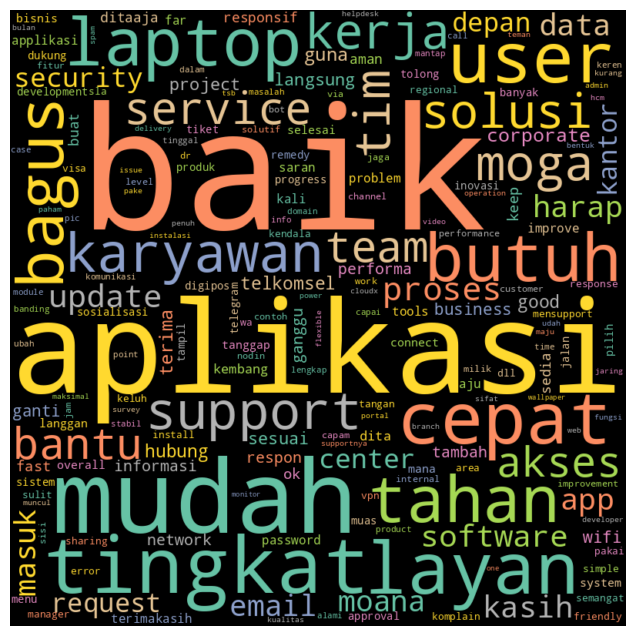

In [ ]:
# POSITIF
train_s0 = df['FinalFeed'].loc[df['Sentiment']=='Positif']
all_text_s0 = ' '.join(word for word in train_s0)
wordcloud = WordCloud(width=800, height=800, collocations=False, background_color='black',colormap='Set2').generate(all_text_s0)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

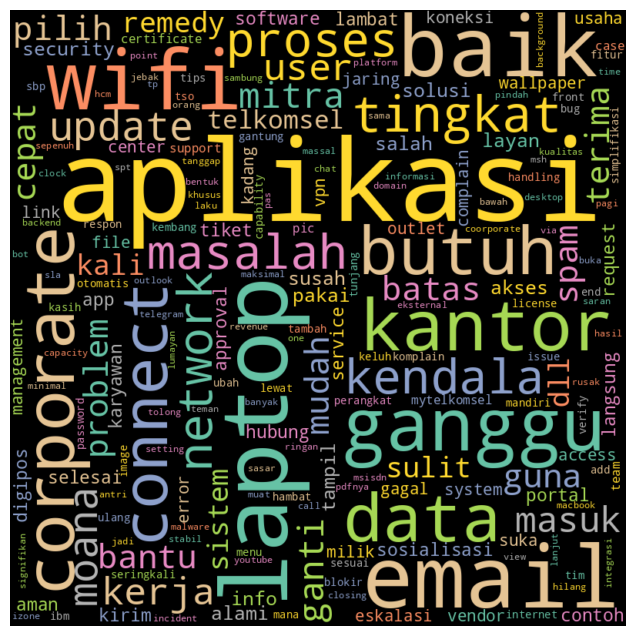

In [ ]:
# Negatif
train_s0 = df['FinalFeed'].loc[df['Sentiment']=='Negatif']
all_text_s0 = ' '.join(word for word in train_s0)
wordcloud = WordCloud(width=800, height=800, collocations=False, background_color='black',colormap='Set2').generate(all_text_s0)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

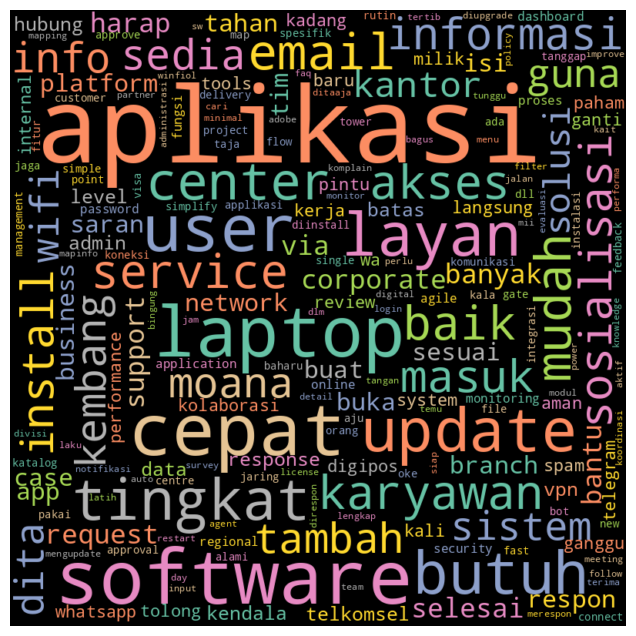

In [ ]:
# NEUTRAL
train_s0 = df['FinalFeed'].loc[df['Sentiment']=='Neutral']
all_text_s0 = ' '.join(word for word in train_s0)
wordcloud = WordCloud(width=800, height=800, collocations=False, background_color='black',colormap='Set2').generate(all_text_s0)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
col_list = df.FinalFeed.values.tolist()
# col_list
values = ','.join(str(v) for v in col_list)
values = remove_punctuation(values)
# values
tokens = nltk.tokenize.word_tokenize(values)
kemunculan2 = nltk.FreqDist(tokens)
print(kemunculan2.most_common())

[('it', 250), ('aplikasi', 169), ('baik', 109), ('laptop', 89), ('butuh', 72), ('mudah', 71), ('user', 65), ('cepat', 64), ('layan', 53), ('software', 52), ('karyawan', 51), ('tingkat', 50), ('email', 49), ('support', 49), ('update', 41), ('kerja', 41), ('tim', 39), ('akses', 37), ('corporate', 37), ('solusi', 36), ('kantor', 35), ('wifi', 34), ('moana', 34), ('data', 34), ('proses', 33), ('bantu', 33), ('masuk', 31), ('service', 31), ('guna', 31), ('network', 28), ('request', 28), ('ganggu', 28), ('bagus', 26), ('up', 26), ('hubung', 26), ('team', 25), ('terima', 25), ('center', 25), ('security', 24), ('informasi', 24), ('connect', 23), ('langsung', 23), ('ganti', 23), ('sesuai', 23), ('kembang', 21), ('kali', 21), ('harap', 20), ('project', 20), ('kendala', 20), ('to', 19), ('tambah', 19), ('business', 19), ('telkomsel', 19), ('dita', 18), ('password', 18), ('sistem', 18), ('moga', 18), ('aman', 18), ('selesai', 18), ('info', 17), ('vpn', 17), ('problem', 17), ('remedy', 17), ('tahan

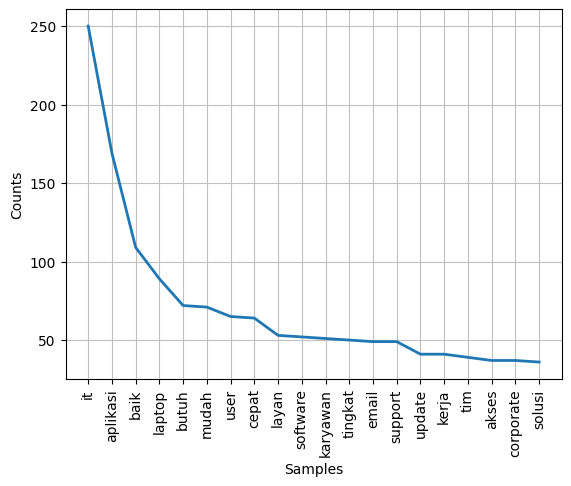

In [ ]:
import matplotlib.pyplot as plt
kemunculan2.plot(20,cumulative=False)
plt.show()

### Naive Bayes Method

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# 0 --> negatif, 1 --> netral, 2 --> positif

# Menggunakan encoder untuk mengencode label sentimen menjadi angka
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

# Hasil encoded_labels adalah array angka yang mewakili label sentimen
print(df['Sentiment'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(analyzer='word',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['FinalFeed'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 61.99%
------------------------------------------------
Confusion Matrix:
    0   1   2
0  14   4   4
1   6  13  18
2  14  19  79
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.64      0.50        22
           1       0.36      0.35      0.36        37
           2       0.78      0.71      0.74       112

    accuracy                           0.62       171
   macro avg       0.52      0.56      0.53       171
weighted avg       0.64      0.62      0.63       171



[[14  4  4]
 [ 6 13 18]
 [14 19 79]]


Text(0.5, 427.9555555555555, 'Predicted label')

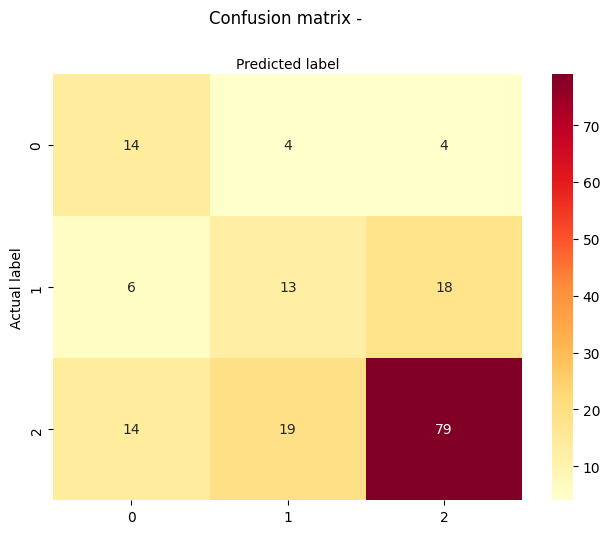

In [ ]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predicted)
print(cnf_matrix)

class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlOrRd" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Multinominal NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted_multinom = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_multinom)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_multinom))

MultinominalNB model accuracy is 61.99%
------------------------------------------------
Confusion Matrix:
   0   1   2
0  8   6   8
1  1   8  28
2  8  14  90
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.36      0.41        22
           1       0.29      0.22      0.25        37
           2       0.71      0.80      0.76       112

    accuracy                           0.62       171
   macro avg       0.49      0.46      0.47       171
weighted avg       0.59      0.62      0.60       171



#### Bernoulli NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted_ber = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted_ber,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_ber)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_ber))

BernoulliNB model accuracy = 59.65%
------------------------------------------------
Confusion Matrix:
   0  1    2
0  1  8   13
1  0  1   36
2  5  7  100
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.05      0.07        22
           1       0.06      0.03      0.04        37
           2       0.67      0.89      0.77       112

    accuracy                           0.60       171
   macro avg       0.30      0.32      0.29       171
weighted avg       0.47      0.60      0.52       171



### Trying different n-grams:

#### Bigram: ngram_range = (2,2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(df['FinalFeed'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, df['Sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 39.18%


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


####Trigram: ngram_range= (3,3)

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(df['FinalFeed'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, df['Sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 40.35%


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


###TF-IDF: Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(df['FinalFeed'])

In [ ]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, df['Sentiment'],test_size=0.20,random_state=30)

In [ ]:
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 66.08%


In [ ]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 59.65%


In [ ]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 63.16%


### Kesimpulan dan Saran

Berdasarkan hasil klasifikasi menggunakan metode naive bayes, metode multinomial, dan metode Bernoulli, dapat disimpulkan bahwa metode naive bayes dan multinomial menghasilkan akurasi yang lebih baik dibandingkan dengan metode Bernoulli. Meskipun akurasi dari ketiga metode tersebut tidak terlalu tinggi, namun masih dapat digunakan sebagai model klasifikasi.

Namun, hasil eksperimen dengan mengganti ngram menjadi Bigram dan Trigram menunjukkan hasil akurasi yang lebih rendah dibandingkan dengan menggunakan ngram pada percobaan sebelumnya. Hal ini mungkin disebabkan oleh adanya kelemahan dari model yang dibuat, atau mungkin perlu dilakukan tunning parameter agar sesuai dengan data yang digunakan.

Selain itu, hasil eksperimen dengan menggunakan metode pembobotan TF-IDF menunjukkan peningkatan akurasi pada metode naivebayes dan multinomial, tetapi malah menurun pada metode Bernoulli. Oleh karena itu, dalam kasus ini, dapat disarankan untuk menggunakan metode naive bayes atau multinomial dengan pembobotan TF-IDF sebagai metode klasifikasi yang lebih baik. Namun, perlu diperhatikan bahwa dataset yang digunakan tidak balance, sehingga hasil klasifikasi dapat dipengaruhi oleh kondisi tersebut dan dapat mempengaruhi hasil yang diharapkan. Oleh karena itu, untuk meningkatkan akurasi klasifikasi, perlu memperhatikan representasi data dan kualitas dataset.